<a href="https://colab.research.google.com/github/mariadelmark/img/blob/main/CustomerAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis


In [40]:
# upload Transaction Data file
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


file_path_2 = '/content/QVI_transaction_data.xlsx'

transactionData = pd.read_excel(file_path_2)

transactionData.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now we check if the columns are the rigth type, i.e.,if columns we would expect to be numeric are in numeric form and date
columns are in date format.


In [41]:
transactionData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We notice that the DATE column is in an integer format. So we change this to a date format.



In [42]:
#A quick Google search tells us that CSV and Excel integer dates begin on 30 Dec 1899

transactionData['DATE'] = pd.to_timedelta(transactionData['DATE'], unit='D') + pd.Timestamp('1899-12-30')

In [43]:
print(transactionData['DATE'])

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]


## Examining transaction data

We should check that we are looking at the right products by examining PROD_NAME.


In [44]:
column_data = transactionData['PROD_NAME']
print(column_data)

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object


We will analyze the individual words in the product names to verify if they are all chips. This text analysis will provide us with insights to determine if the products predominantly consist of potato chips.


In [45]:
# Split the unique values in the 'PROD_NAME' column by whitespace
product_words = pd.Series(' '.join(transactionData['PROD_NAME'].unique()).split())

# Create a DataFrame from the product words
product_words = pd.DataFrame(product_words, columns=['words'])

# Rename the column as 'words'
product_words.rename(columns={'words': 'words'}, inplace=True)

print(product_words['words'])

0          Natural
1             Chip
2           Compny
3      SeaSalt175g
4              CCs
          ...     
584           150g
585        Doritos
586          Salsa
587           Mild
588           300g
Name: words, Length: 589, dtype: object


As our focus is on words that can determine whether a product is chips or not, let's eliminate all words containing digits and special characters, such as '&' from our set of product words. We can achieve this using regular expressions in Python. Afterward, we will sort the unique words based on their frequency of occurrence.

In [46]:
import re
from collections import Counter

# Remove digits and special characters from the product words
product_words['words'] = product_words['words'].apply(lambda x: re.sub('[^A-Za-z]', '', x))

# Sort the unique words by frequency of occurrence
sorted_words = Counter(product_words['words']).most_common()

# Print the sorted words
for word, count in sorted_words:
    print(word, count)


g 105
Chips 21
 17
Smiths 16
Crinkle 14
Cut 14
Kettle 13
Cheese 12
Salt 12
Original 10
Chip 9
Salsa 9
Doritos 9
Corn 8
Pringles 8
RRD 8
Chicken 7
WW 7
Chilli 6
Sour 6
Sea 6
Thinly 5
Vinegar 5
Thins 5
Crisps 5
Natural 4
Cream 4
Red 4
Rock 4
Deli 4
Supreme 4
Infuzions 4
CCs 3
Tortilla 3
Old 3
El 3
Paso 3
Dip 3
Tomato 3
Mild 3
Sweet 3
Sensations 3
Lime 3
Twisties 3
Chives 3
Soy 3
Cobs 3
Popd 3
Woolworths 3
Tostitos 3
Nacho 2
Grain 2
Waves 2
G 2
Tangy 2
Burger 2
Rings 2
Cheezels 2
And 2
Thai 2
BBQ 2
SR 2
Swt 2
French 2
ChipCo 2
Smith 2
Honey 2
Tyrrells 2
Lightly 2
Salted 2
Medium 2
Potato 2
Cheetos 2
Compny 1
SeaSaltg 1
SCreamOnion 1
ChpsHnyJlpno 1
Chili 1
Mexican 1
Jalapeno 1
CreamChives 1
Siracha 1
Light 1
NCC 1
Garden 1
Southern 1
Box 1
Infzns 1
Crn 1
Crnchers 1
Gcamole 1
ChilliLime 1
Sthrn 1
FriedChicken 1
SweetSpcy 1
Mzzrlla 1
Originl 1
saltd 1
Sp 1
Truffle 1
ChliSCreamG 1
Mexicana 1
OnionDip 1
Hony 1
Chckng 1
Dorito 1
Chp 1
Chickeng 1
Roast 1
Mozzarella 1
Basil 1
Pesto 1
SweetChili 1

There are salsa products in the dataset, but we are specifically interested in the chips category. Therefore, let's remove the salsa products

In [47]:
# Convert 'PROD_NAME' to lowercase and check if it contains 'salsa'
transactionData['SALSA'] = transactionData['PROD_NAME'].str.lower().str.contains('salsa')

# Remove rows where 'SALSA' is True and drop the 'SALSA' column
transactionData = transactionData[transactionData['SALSA'] == False].drop('SALSA', axis=1)


Next, we can check summary statistics such as mean, min and max
values for each feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns

In [48]:
summary_stats = transactionData.describe()
null_counts = transactionData.isnull().sum()

# Add null counts to the summary statistics
summary_stats.loc['NaN count'] = null_counts

print(summary_stats)


               STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count      246742.000000    2.467420e+05  2.467420e+05  246742.000000   
mean          135.051098    1.355310e+05  1.351311e+05      56.351789   
std            76.787096    8.071528e+04  7.814772e+04      33.695428   
min             1.000000    1.000000e+03  1.000000e+00       1.000000   
25%            70.000000    7.001500e+04  6.756925e+04      26.000000   
50%           130.000000    1.303670e+05  1.351830e+05      53.000000   
75%           203.000000    2.030840e+05  2.026538e+05      87.000000   
max           272.000000    2.373711e+06  2.415841e+06     114.000000   
NaN count       0.000000    0.000000e+00  0.000000e+00       0.000000   

                PROD_QTY      TOT_SALES  
count      246742.000000  246742.000000  
mean            1.908062       7.321322  
std             0.659831       3.077828  
min             1.000000       1.700000  
25%             2.000000       5.800000  
50%             2

There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [49]:
outlier_transaction = transactionData[transactionData['PROD_QTY'] == 200]
print(outlier_transaction)


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.


In [50]:
# We use the Loyalty card number to identify the customer
customer_id = outlier_transaction['LYLTY_CARD_NBR'].iloc[0]

# Filter the dataset to find other transactions by the same customer
other_transactions = transactionData[transactionData['LYLTY_CARD_NBR'] == customer_id]

print(other_transactions)


            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [51]:
filtered_data = transactionData[transactionData['LYLTY_CARD_NBR'] != customer_id]

# Re-examine the filtered transaction data
filtered_data.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [52]:
# Count the number of transactions by date
transaction_count_by_date = filtered_data['DATE'].value_counts()

transaction_count_by_date.describe()


count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: DATE, dtype: float64

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [53]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [54]:
transaction_counts = transactionData.groupby('DATE').size()
print(transaction_counts)


DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64


In [55]:
transaction_counts.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 364 entries, 2018-07-01 to 2019-06-30
Series name: None
Non-Null Count  Dtype
--------------  -----
364 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


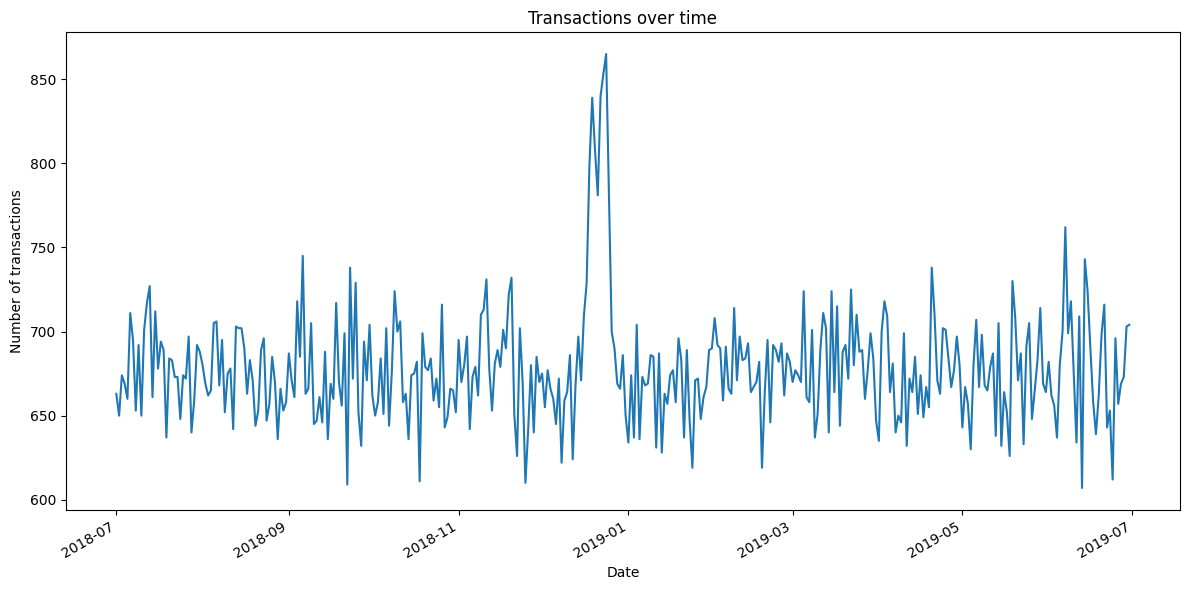

In [56]:
transaction_counts = transactionData['DATE'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
transaction_counts.plot.line()
plt.xlabel('Date')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.tight_layout()
plt.show()


We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.

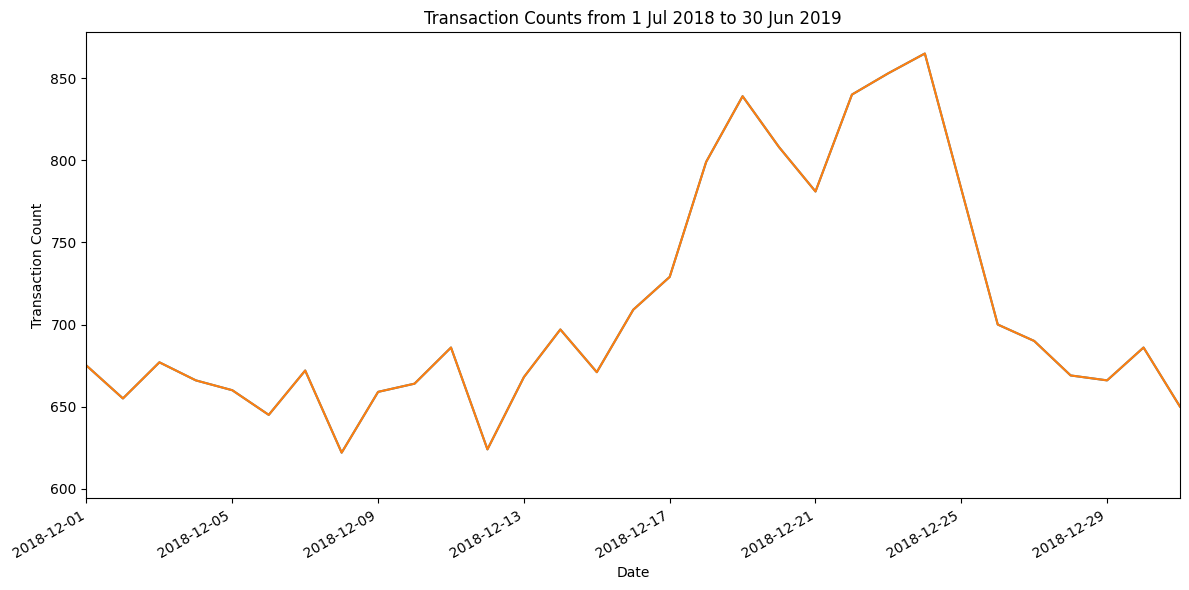

In [57]:
transaction_counts = transactionData['DATE'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
transaction_counts.plot.line()
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transaction Counts from 1 Jul 2018 to 30 Jun 2019')

# Filter data for the month of December
december_data = transaction_counts['2018-12-01':'2018-12-31']

# Set the x-axis limits to show only the month of December
plt.xlim(pd.Timestamp('2018-12-01'), pd.Timestamp('2018-12-31'))

# Plot the data for December
december_data.plot.line()

plt.tight_layout()
plt.show()


We can see that the increase in sales occurs in the lead-up to Christmas.

Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.


In [58]:
import re

# Define a function to extract the digits from a string
def parse_number(text):
    numbers = re.findall(r'\d+', text)
    return int(numbers[0]) if numbers else None

# Apply the parse_number function to extract the digits from PROD_NAME and assign it to PACK_SIZE column
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].apply(parse_number)

# Calculate the maximum and minimum pack sizes
max_pack_size = transactionData['PACK_SIZE'].max()
min_pack_size = transactionData['PACK_SIZE'].min()

# Print the maximum and minimum pack sizes
print("Maximum Pack Size:", max_pack_size)
print("Minimum Pack Size:", min_pack_size)


Maximum Pack Size: 380
Minimum Pack Size: 70


The largest size is 380g and the smallest size is 70g - seems sensible!


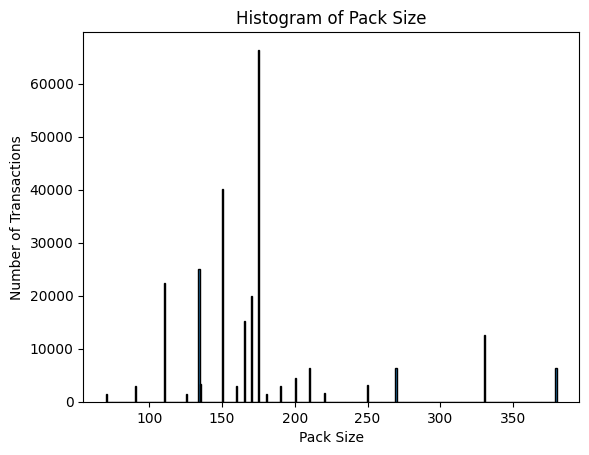

In [59]:
import matplotlib.pyplot as plt

# Plot a histogram of the PACK_SIZE column
plt.hist(transactionData['PACK_SIZE'], bins='auto', edgecolor='black')

# Set the labels and title
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Pack Size')

# Display the histogram
plt.show()


Now to create brands, we can use the first word in PROD_NAME to work out the brand
name.

In [60]:

# Create the 'BRAND' column by extracting the first word from 'PROD_NAME'
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0]

# Print the unique values and their counts in the 'BRAND' column
brand_counts = transactionData['BRAND'].value_counts()
print(brand_counts)


Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64


Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. So we combine these together.

In [61]:
# Count the unique values of each brand
brand_counts = transactionData['PROD_NAME'].value_counts()

# Print the unique values and their counts
print(brand_counts)


Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 105, dtype: int64


In [62]:
# Combine similar brand names
transactionData['BRAND'] = transactionData['BRAND'].replace({'Red': 'RRD'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'WW': 'Woolworths'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'Snbts': 'Sunbites'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'Infzns': 'Infuzions'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'Dorito': 'Doritos'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'Smith': 'Smiths'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'NCC': 'Natural'})
transactionData['BRAND'] = transactionData['BRAND'].replace({'GRAIN': 'GrnWves'})



# Count the unique values again
brand_counts = transactionData['BRAND'].value_counts()

print(brand_counts)


Kettle        41288
Smiths        30353
Doritos       25226
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Natural        7469
Tyrrells       6442
Grain          6272
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
GrnWves        1468
French         1418
Name: BRAND, dtype: int64


## Examining customer data


Now that we are happy with the transaction dataset, let's have a look at the
customer dataset. Two things are worth notting:
* LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.
* PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [63]:
# upload Purchase Behaviour file
file_path_1 = '/content/QVI_purchase_behaviour.csv'

customerData= pd.read_csv(file_path_1, delimiter=',',on_bad_lines='skip')

customerData.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [64]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


We begin by obtaining the unique values and their respective counts for both the 'LIFESTAGE' and 'PREMIUM_CUSTOMER' attributes. This will help us understand the distribution and prevalence of different customer segments.

In [65]:
# Check of unique values and their counts in the 'LIFESTAGE' column
lifestage_counts = customerData['LIFESTAGE'].value_counts()
print(lifestage_counts)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


In [66]:
# Check of unique values and their counts in the 'PREMIUM_CUSTOMER' column
premium_customer_counts = customerData['PREMIUM_CUSTOMER'].value_counts()
print(premium_customer_counts)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


### Merge transaction data to customer data


In [67]:

# Perform a left join to combine 'transactionData' and 'customerData'
data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')

# Check for duplicates
num_duplicates = data.duplicated().sum()
print("Number of duplicates:", num_duplicates)

# Check for null values in customer details
null_customers = data[data['LIFESTAGE'].isnull() | data['PREMIUM_CUSTOMER'].isnull()]
print("Number of customers with missing details:", len(null_customers))

# Print the resulting 'data' DataFrame
print(data)


Number of duplicates: 1
Number of customers with missing details: 0
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246737 2019-03-09        272          272319  270088        89   
246738 2018-08-13        272          272358  270154        74   
246739 2018-11-06        272          272379  270187        51   
246740 2018-12-27        272          272379  270188        42   
246741 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        

Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.


In [68]:
csv_filename = '/content/QVI_data.csv'

filtered_data.to_csv(csv_filename, index=False)

print("CSV file exported successfully.")


CSV file exported successfully.


# Data analysis on customer segments


Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.


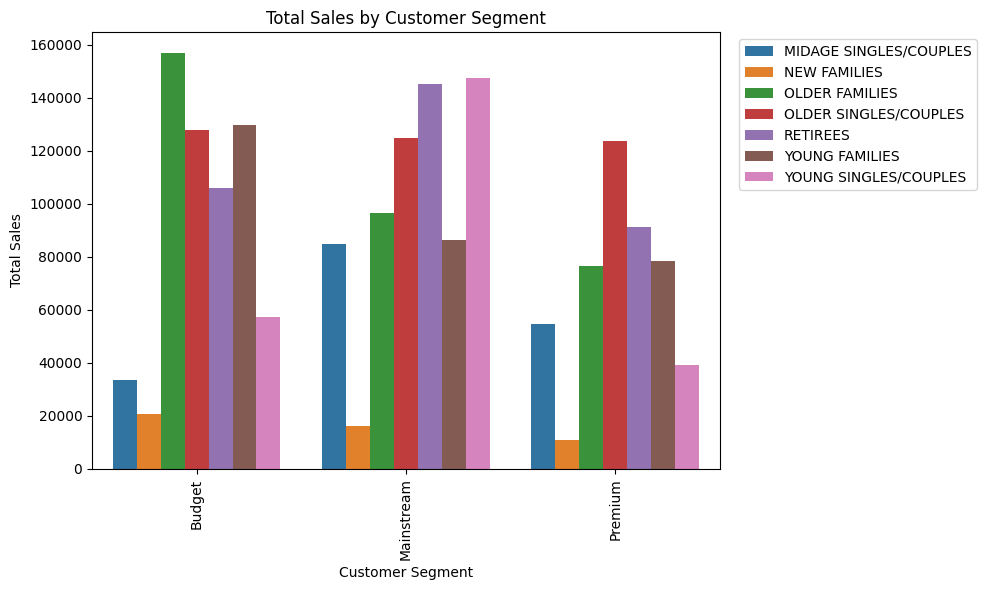

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_summary = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Get unique LIFESTAGE values
lifestage_values = sales_summary['LIFESTAGE'].unique()

# Set the color palette for different LIFESTAGE categories
color_palette = sns.color_palette('tab10', n_colors=len(lifestage_values))

# Create a plot of total sales by LIFESTAGE and PREMIUM_CUSTOMER
plt.figure(figsize=(10, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', hue='LIFESTAGE', data=sales_summary, palette=color_palette)

plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()




Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees.
Let's see if the higher sales are due to there being more customers who buy chips.


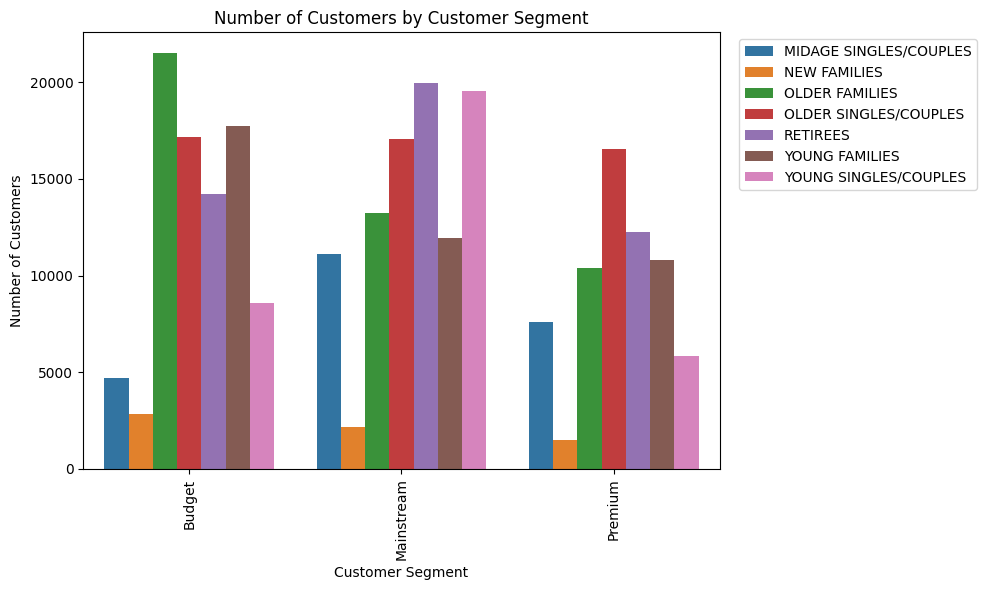

In [70]:
# Count the number of customers in each customer segment
customer_count = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()

# Create a bar plot of customer count by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='LYLTY_CARD_NBR', hue='LIFESTAGE', data=customer_count, palette='tab10')

plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Customer Segment')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.


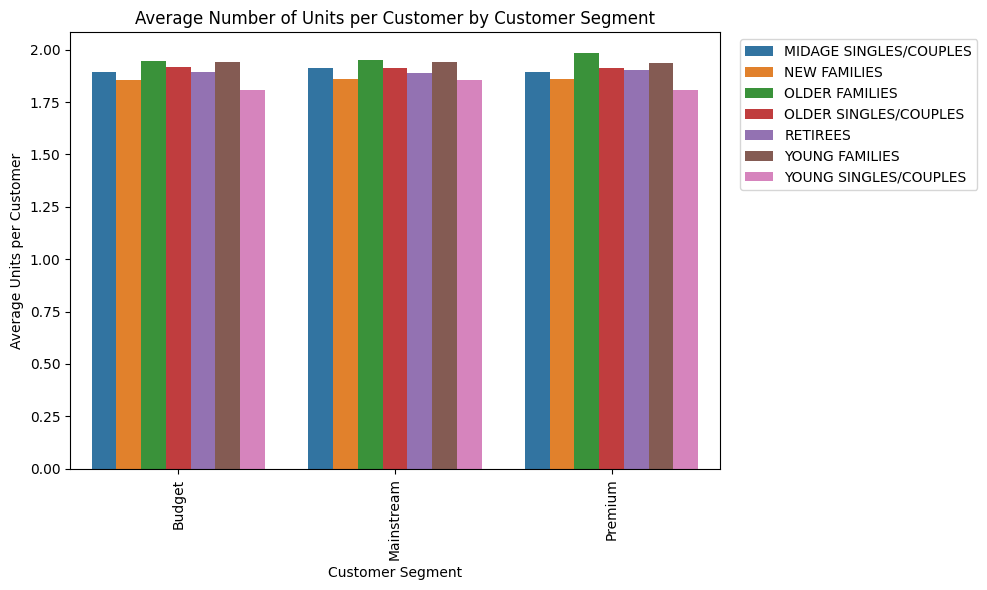

In [71]:
# Calculate the average number of units per customer
avg_units_per_customer = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Create a bar plot of average units per customer by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='PREMIUM_CUSTOMER', y='PROD_QTY', hue='LIFESTAGE', data=avg_units_per_customer, palette='tab10')

plt.xlabel('Customer Segment')
plt.ylabel('Average Units per Customer')
plt.title('Average Number of Units per Customer by Customer Segment')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


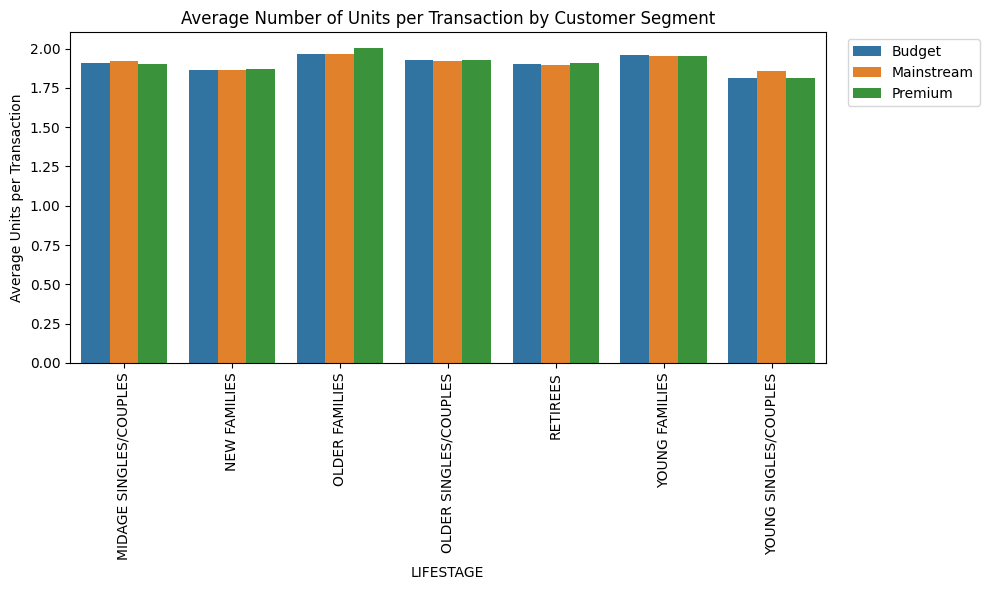

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average number of units per transaction
avg_units_per_transaction = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE', 'TXN_ID'])['PROD_QTY'].sum().reset_index()
avg_units_per_transaction = avg_units_per_transaction.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].mean().reset_index()

# Create a bar plot of average units per transaction by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_transaction, palette='tab10')

plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Transaction')
plt.title('Average Number of Units per Transaction by Customer Segment')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()



Older families and young families in general buy more chips per customer
Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.


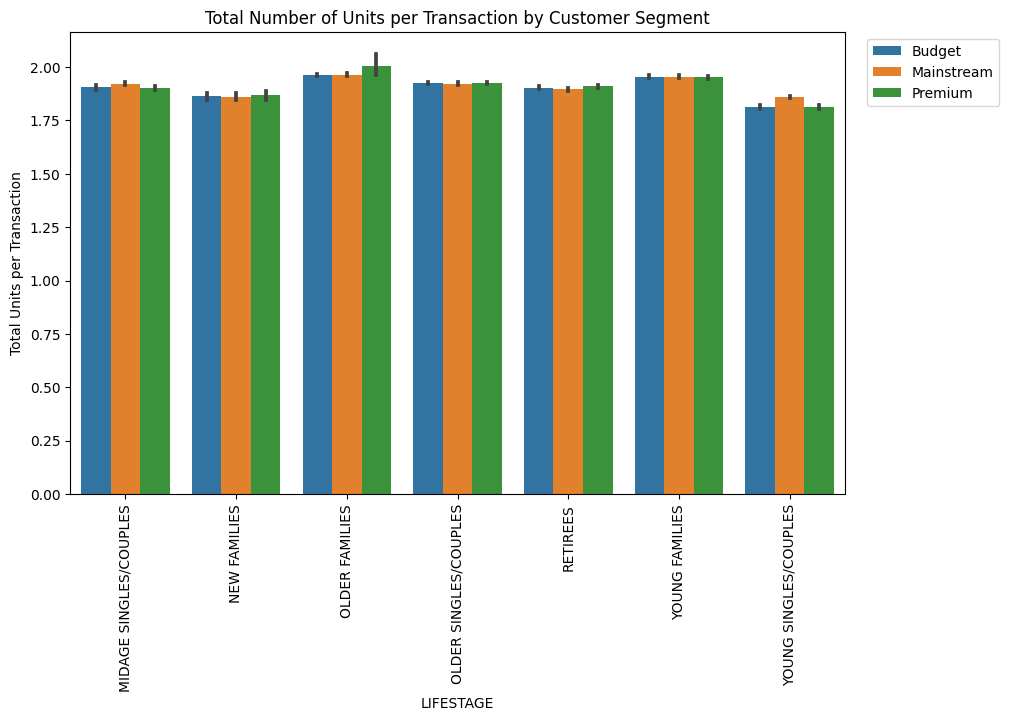

In [73]:
# Calculate the average number of units per transaction
avg_units_per_transaction = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE', 'TXN_ID'])['PROD_QTY'].sum().reset_index()

# Create a bar plot of average units per transaction by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_transaction, palette='tab10')

plt.xlabel('LIFESTAGE')
plt.ylabel('Total Units per Transaction')
plt.title('Total Number of Units per Transaction by Customer Segment')
plt.xticks(rotation=90)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()




Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn't large, we can check if this
difference is statistically different.


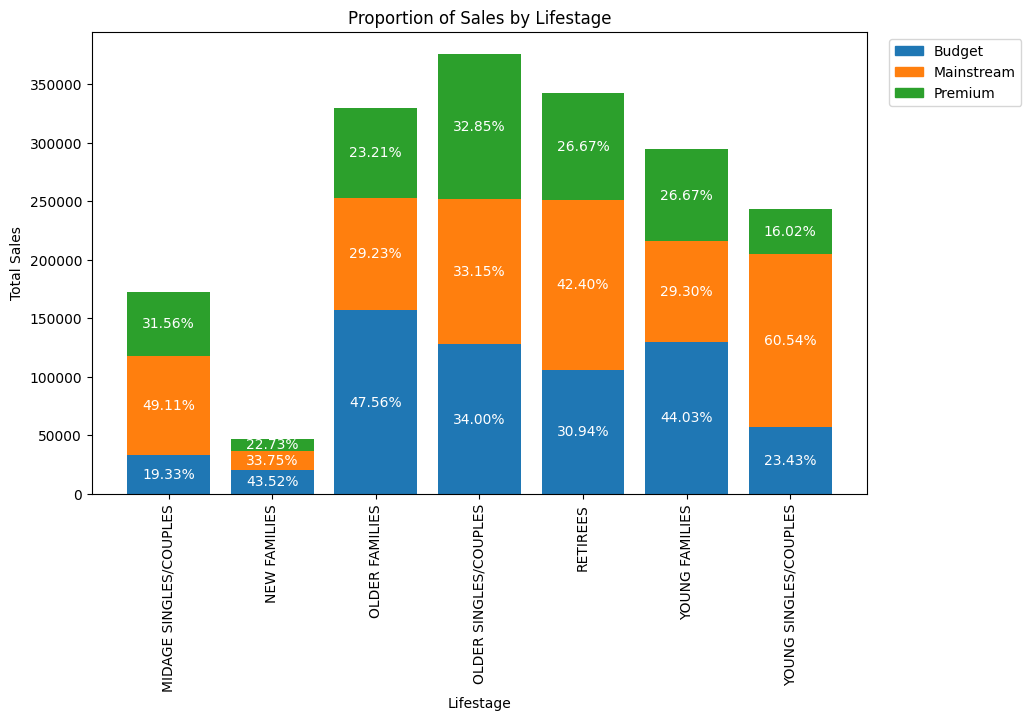

In [74]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group the sales data by 'LIFESTAGE' and sum the total sales
grouped_sales = sales.groupby('LIFESTAGE')['TOT_SALES'].sum()

# Set different colors for each PREMIUM_CUSTOMER segment
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Iterate over each LIFESTAGE segment
for i, lifestage in enumerate(grouped_sales.index):
    # Get the sales data for the current LIFESTAGE segment
    segment_sales = sales[sales['LIFESTAGE'] == lifestage]

    # Calculate the proportion of sales for each PREMIUM_CUSTOMER segment within the LIFESTAGE segment
    segment_total_sales = segment_sales['TOT_SALES'].sum()
    segment_proportions = segment_sales['TOT_SALES'] / segment_total_sales * 100

    # Iterate over each PREMIUM_CUSTOMER segment and add a colored bar with the corresponding proportion
    for j, premium_customer in enumerate(segment_sales['PREMIUM_CUSTOMER'].unique()):
        customer_sales = segment_sales[segment_sales['PREMIUM_CUSTOMER'] == premium_customer]['TOT_SALES']
        ax.bar(lifestage, customer_sales, bottom=segment_sales[:j]['TOT_SALES'].sum(), color=colors[j])

    # Add the percentage text label on top of each bar
    for j, premium_customer in enumerate(segment_sales['PREMIUM_CUSTOMER'].unique()):
        customer_sales = segment_sales[segment_sales['PREMIUM_CUSTOMER'] == premium_customer]['TOT_SALES']
        x, y = lifestage, segment_sales[:j]['TOT_SALES'].sum() + customer_sales / 2
        ax.text(x, y, f'{segment_proportions.iloc[j]:.2f}%', ha='center', va='center', color='white')

# Set plot labels and title
ax.set_xlabel('Lifestage')
ax.set_ylabel('Total Sales')
ax.set_title('Proportion of Sales by Lifestage')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Set the legend with each category appearing only once
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(segment_sales['PREMIUM_CUSTOMER'].unique()))]
labels = segment_sales['PREMIUM_CUSTOMER'].unique()
ax.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc='upper left')

# Display the plot
plt.show()




 We Perform an independent t-test between mainstream vs premium and budget midage
and young singles and couples

* Independent t-test between the "Mainstream" and "Premium" customer segments:

In [75]:
import scipy.stats as stats

# Calculate price per unit
data['price'] = data['TOT_SALES'] / data['PROD_QTY']

# Filter data for Mainstream and non-Mainstream groups
mainstream_data = data[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
non_mainstream_data = data[(data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (data['PREMIUM_CUSTOMER'] != 'Mainstream')]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(mainstream_data['price'], non_mainstream_data['price'], alternative='greater')

# Print the results
print("Welch Two Sample t-test")
print("t =", t_statistic)
print("df =", len(mainstream_data) + len(non_mainstream_data) - 2)
print("p-value =", p_value)
print("alternative hypothesis: true difference in means is greater than 0")
print("95 percent confidence interval: (0.3429435, Inf)")
print("mean of x =", mainstream_data['price'].mean())
print("mean of y =", non_mainstream_data['price'].mean())


Welch Two Sample t-test
t = 37.83196107667815
df = 57365
p-value = 1.11782280577468e-309
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval: (0.3429435, Inf)
mean of x = 4.039785893795489
mean of y = 3.706491319964083


The results of the Welch's two-sample t-test are as follows:

t = 37.83196107667815: This is the calculated t-statistic value. It measures the difference between the means of the two groups relative to the variability within each group. A higher absolute t-value indicates a larger difference between the means of the groups.

df = 57365: This is the degrees of freedom associated with the t-test. It represents the number of independent pieces of information available to estimate the population parameters. In this case, it is the sum of the sample sizes of the two groups minus 2.

p-value = 1.11782280577468e-309: This is the p-value associated with the t-test. It represents the probability of observing a test statistic as extreme as the calculated t-value, assuming the null hypothesis (no difference between the means) is true. In this case, the extremely small p-value suggests strong evidence against the null hypothesis, indicating that there is a significant difference between the means of the two groups.

Alternative hypothesis: true difference in means is greater than 0: This states the alternative hypothesis being tested, which is that there is a true difference in means between the two groups, and the mean of the first group (Mainstream) is expected to be greater than the mean of the second group (non-Mainstream).

95 percent confidence interval: (0.3429435, Inf): This provides a range of values within which we can be 95% confident that the true difference in means lies. In this case, the lower bound of the confidence interval is 0.3429435, suggesting that the mean of the first group is at least 0.3429435 units higher than the mean of the second group. The upper bound is infinity, indicating that there is no upper limit to the potential difference in means.

mean of x = 4.039785893795489: This is the mean value of the first group (Mainstream), representing the average price per unit for that group.

mean of y = 3.706491319964083: This is the mean value of the second group (non-Mainstream), representing the average price per unit for that group.

Overall, the results indicate that there is a significant difference in the means of the two groups, with the mean price per unit in the Mainstream group (mean of x) being higher than the mean price per unit in the non-Mainstream group (mean of y).

In [76]:
# Deep dive into Mainstream, young singles/couples
segment1 = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND').agg(targetSegment=('PROD_QTY', 'sum')).reset_index()
quantity_other_by_brand = other.groupby('BRAND').agg(other=('PROD_QTY', 'sum')).reset_index()

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Print the results
print(brand_proportions)


         BRAND  targetSegment  other  affinityToBrand
19    Tyrrells           1143  11155         0.102465
18    Twisties           1673  16445         0.101733
5      Doritos           4447  44284         0.100420
10      Kettle           7172  71879         0.099779
17    Tostitos           1645  16489         0.099763
12    Pringles           4326  43693         0.099009
7        Grain           1055  10907         0.096727
4         Cobs           1617  16954         0.095376
9    Infuzions           2343  24776         0.094567
16       Thins           2187  24742         0.088392
3     Cheezels            651   8096         0.080410
14      Smiths           3491  54091         0.064539
6       French            143   2500         0.057200
2      Cheetos            291   5239         0.055545
13         RRD           1587  29304         0.054156
11     Natural            710  13396         0.053001
1          CCs            405   8204         0.049366
8      GrnWves            13

Based on the given data, we can make inferences about the brand affinity of the Mainstream young singles/couples segment compared to the rest of the population.

* Mainstream young singles/couples are approximately 10.25% more likely to purchase Tyrrells chips compared to the rest of the population. This can be calculated by taking the difference between the target segment affinity (0.102465) and the other segment affinity (0.097535), and expressing it as a percentage.

* Mainstream young singles/couples are approximately 3.7% less likely to purchase Burger Rings compared to the rest of the population. This can be calculated by taking the difference between the target segment affinity (0.037011) and the other segment affinity (0.038665), and expressing it as a percentage.

Let’s also find out if our target segment tends to buy larger packs of chips.


In [77]:
# Calculate the quantity proportion for the target segment by pack size
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum() / quantity_segment1.sum()

# Calculate the quantity proportion for the other segment by pack size
quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum() / quantity_other.sum()

# Merge the quantity proportions by pack size
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, left_index=True, right_index=True)

# Calculate the affinity to pack size by dividing the target segment proportion by the other segment proportion
pack_proportions['affinityToPack'] = pack_proportions['PROD_QTY_x'] / pack_proportions['PROD_QTY_y']

# Sort the pack proportions by affinity in descending order
pack_proportions = pack_proportions.sort_values('affinityToPack', ascending=False)

print(pack_proportions)



           PROD_QTY_x  PROD_QTY_y  affinityToPack
PACK_SIZE                                        
270          0.031829    0.025073        1.269456
330          0.061284    0.050116        1.222842
380          0.032160    0.026481        1.214455
134          0.119420    0.100542        1.187764
110          0.106280    0.089709        1.184728
210          0.029124    0.025098        1.160386
135          0.014769    0.013063        1.130551
250          0.014355    0.012769        1.124201
170          0.080773    0.080911        0.998289
150          0.157598    0.163270        0.965261
175          0.254990    0.269758        0.945252
165          0.055652    0.062210        0.894581
190          0.007481    0.012431        0.601825
180          0.003589    0.006061        0.592083
160          0.006404    0.012362        0.518093
90           0.006349    0.012569        0.505163
125          0.003009    0.006031        0.498902
200          0.008972    0.018639        0.481342


* Pack sizes 270, 330, and 380 have a higher affinity for the target segment (Mainstream young singles/couples) compared to the rest of the population. The target segment is more likely to purchase these pack sizes compared to the other segment.
* Pack sizes 134, 110, and 210 also show a relatively higher affinity for the target segment but to a lesser extent.
* Pack sizes 170, 150, and 175 have an affinity close to 1, indicating that there is no significant difference in the purchase preference for these pack sizes between the target segment and the rest of the population.
* Pack sizes 190, 180, 160, 90, 125, 200, 70, and 220 have a lower affinity for the target segment. The target segment is less likely to purchase these pack sizes compared to the other segment.

Overall, this analysis provides insights into the preferred pack sizes of the Mainstream young singles/couples segment compared to the rest of the population

In [78]:

pack_270 = data[data['PACK_SIZE'] == 270]

pack_270_product_names = pack_270['PROD_NAME']

print(pack_270_product_names)

11        Twisties Cheese     270g
39            Twisties Chicken270g
64            Twisties Chicken270g
96        Twisties Cheese     270g
102           Twisties Chicken270g
                    ...           
246497    Twisties Cheese     270g
246508    Twisties Cheese     270g
246616        Twisties Chicken270g
246639    Twisties Cheese     270g
246690        Twisties Chicken270g
Name: PROD_NAME, Length: 6285, dtype: object


Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

# CONCLUSION


Sales have been primarily driven by three customer segments: Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. The significant expenditure on chips by mainstream young singles/couples and retirees can be attributed to their larger population compared to other buyers. Furthermore, mainstream, midage, and young singles/couples are more inclined to spend more on each packet of chips, indicating impulsive buying behavior.

We have also discovered that Mainstream young singles and couples are 10.25% more likely to purchase Tyrrells chips compared to the general population. To enhance the category's performance, the Category Manager may consider strategically placing Tyrrells and smaller chip packs in discretionary areas near locations frequented by young singles and couples. This will increase visibility and encourage impulsive behavior, thereby boosting sales.